In [ ]:
# Phân tích và trực quan dữ liệu (doanh thu, danh mục, payment)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("data/ecommerce_cleaned.csv")
print("Dữ liệu đã nạp thành công!")
print("Kích thước dữ liệu:", df.shape)
print("\n5 dòng đầu tiên:")
display(df.head())

✅ Dữ liệu đã nạp thành công!
Kích thước dữ liệu: (3660, 11)

5 dòng đầu tiên:


,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,TotalPrice,Month,Year
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-12-11,31.0505,12.0,2024.0
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-09-02,186.2320,9.0,2024.0
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,2024-01-09,237.7650,1.0,2024.0
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,Upi,2024-01-04,129.8925,1.0,2024.0
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,NaN,195.8400,NaN,NaN



📊 Thống kê mô tả:


,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,TotalPrice,Month,Year
count,3660,3660,3660,3660.000000,3660.000000,3660.000000,3660,1454,3660.000000,1454.000000,1454.0
unique,3660,3660,7,NaN,NaN,NaN,5,132,NaN,NaN,NaN
top,e73ad07c,a5d07442-d,Home & Kitchen,NaN,NaN,NaN,Credit Card,2024-12-06,NaN,NaN,NaN
freq,1,1,549,NaN,NaN,NaN,760,20,NaN,NaN,NaN
mean,NaN,NaN,NaN,254.800675,18.825137,206.906579,NaN,NaN,206.906575,6.678817,2024.0
std,NaN,NaN,NaN,141.682621,14.731338,122.687844,NaN,NaN,122.687841,3.477487,0.0
min,NaN,NaN,NaN,10.090000,0.000000,5.890000,NaN,NaN,5.890000,1.000000,2024.0
25%,NaN,NaN,NaN,134.012500,5.000000,104.512500,NaN,NaN,104.509500,4.000000,2024.0
50%,NaN,NaN,NaN,253.845000,15.000000,199.185000,NaN,NaN,199.183000,7.000000,2024.0
75%,NaN,NaN,NaN,377.595000,25.000000,304.117500,NaN,NaN,304.115625,10.000000,2024.0


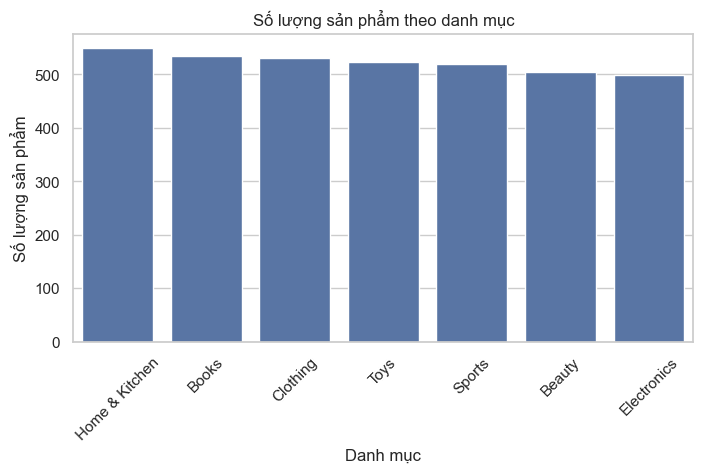

In [ ]:
print("\nThống kê mô tả:")
display(df.describe(include='all'))

# Kiểm tra số lượng sản phẩm theo danh mục
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Số lượng sản phẩm theo danh mục")
plt.xlabel("Danh mục")
plt.ylabel("Số lượng sản phẩm")
plt.xticks(rotation=45)
plt.show()

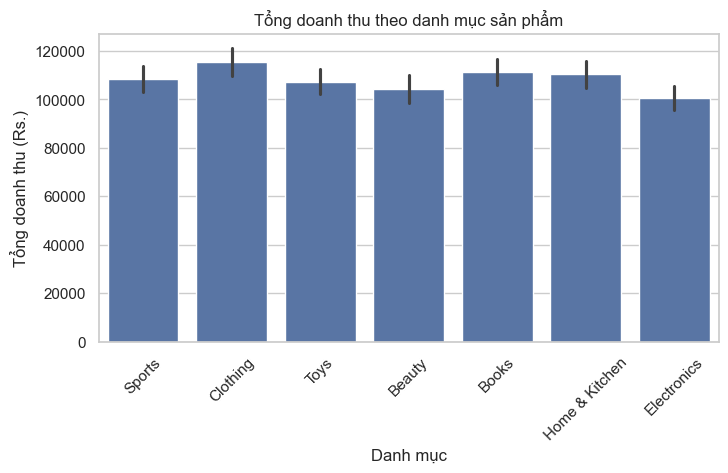

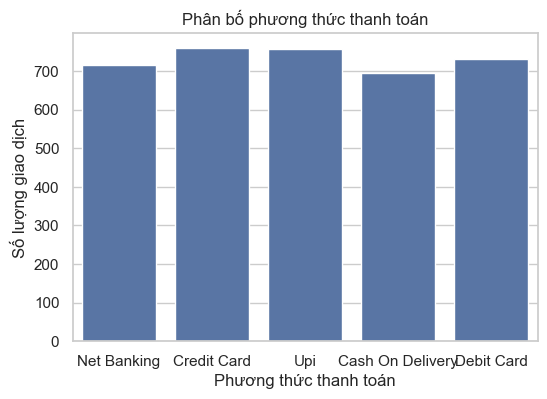

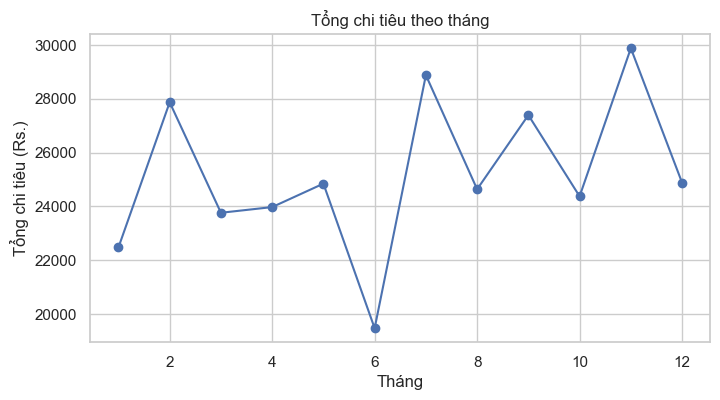

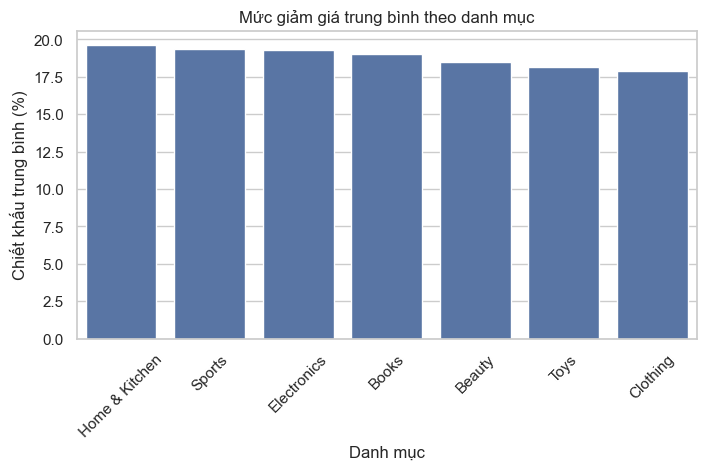

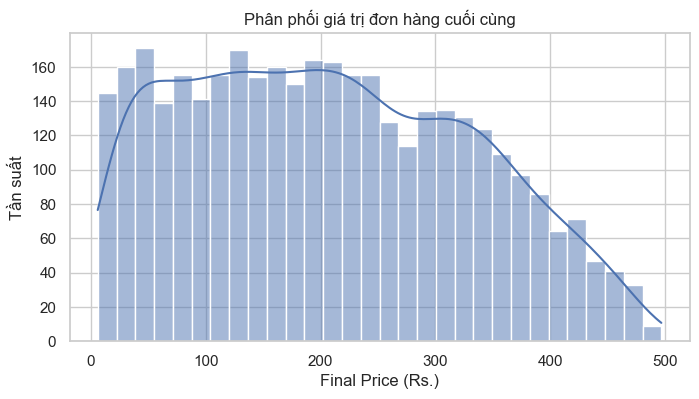

In [3]:
# ---- 3.1 Doanh thu theo danh mục sản phẩm ----
plt.figure(figsize=(8,4))
sns.barplot(x='Category', y='Final_Price(Rs.)', data=df, estimator=sum)
plt.title("Tổng doanh thu theo danh mục sản phẩm")
plt.xlabel("Danh mục")
plt.ylabel("Tổng doanh thu (Rs.)")
plt.xticks(rotation=45)
plt.show()

# ---- 3.2 Phương thức thanh toán ----
plt.figure(figsize=(6,4))
sns.countplot(x='Payment_Method', data=df)
plt.title("Phân bố phương thức thanh toán")
plt.xlabel("Phương thức thanh toán")
plt.ylabel("Số lượng giao dịch")
plt.show()

# ---- 3.3 Chi tiêu theo tháng ----
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.month

monthly_revenue = df.groupby('Month')['Final_Price(Rs.)'].sum()
plt.figure(figsize=(8,4))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Tổng chi tiêu theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng chi tiêu (Rs.)")
plt.grid(True)
plt.show()

# ---- 3.4 Mức giảm giá trung bình theo danh mục ----
discount_avg = df.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=discount_avg.index, y=discount_avg.values)
plt.title("Mức giảm giá trung bình theo danh mục")
plt.xlabel("Danh mục")
plt.ylabel("Chiết khấu trung bình (%)")
plt.xticks(rotation=45)
plt.show()

# ---- 3.5 Phân phối giá cuối cùng ----
plt.figure(figsize=(8,4))
sns.histplot(df['Final_Price(Rs.)'], bins=30, kde=True)
plt.title("Phân phối giá trị đơn hàng cuối cùng")
plt.xlabel("Final Price (Rs.)")
plt.ylabel("Tần suất")
plt.show()